In [7]:
import sys
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import logging
from optparse import OptionParser



from sklearn.cluster import KMeans
import nltk

import gensim

from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import sqlite3 as lite

import pyLDAvis 
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
 p='/docs.txt'

file = open(p,encoding = "ISO-8859-1")
    
newLines = []
i = 0
headers = []
patent_id = []

for sent in file:
    if i < 1 :
        var = sent.split('|')
        headers.append(var[0])
        headers.append(var[1])
        headers.append(var[2])
        i=i+1
    else:
        var = sent.split('|')
        patent_id.append(var[0])
        newLines.append(var[1])
        

  

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','first','second','two','one'])


In [4]:
print(patent_id[0])
print(newLines[0])
print(headers[2])

09532690
A robot cleaner capable of vacuuming foreign materials on a floor includes a main body to which a dust collector is mounted and a vacuuming unit provided at a front portion of the main body to clean a floor. The vacuuming unit is configured to move relative to the main body. If it is determined that the robot cleaner is located near a wall or an obstacle, the vacuuming unit moves to the wall or the obstacle. Since the vacuuming unit contacts the wall or the obstacle, a region of a floor near the wall or the obstacle may be cleaned. Further, a manual cleaner may be selectively connected to a channel connector of the robot cleaner so that a user may choose automatic or manual cleaning of a floor at the user's convenience.
title1



In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# example_sent = "This is a sample sentence, showing off the stop words filtration."

# stop_words = set(stopwords.words('english'))

# word_tokens=[]
# for line in newLines: 
#     word_tokens = word_tokens+word_tokenize(line)

# filtered_sentence = [w for w in word_tokens if not w in stop_words]


# print(word_tokens[1])
# print(filtered_sentence[:50])

In [11]:
vectorizer = TfidfVectorizer(max_df=0.6, max_features=10000,
                                 min_df=2, stop_words=stop_words,
                                 use_idf=True)

X = vectorizer.fit_transform(newLines)
# print(X[0:10])

In [12]:
numClusters=4
km = KMeans(n_clusters=numClusters, init='k-means++', max_iter=100, n_init=1,
                verbose=True)
km.fit(X)

Initialization complete
Iteration  0, inertia 2460.624
Iteration  1, inertia 1263.474
Iteration  2, inertia 1259.207
Iteration  3, inertia 1257.439
Iteration  4, inertia 1256.556
Iteration  5, inertia 1256.143
Iteration  6, inertia 1255.905
Iteration  7, inertia 1255.777
Iteration  8, inertia 1255.681
Iteration  9, inertia 1255.619
Iteration 10, inertia 1255.557
Iteration 11, inertia 1255.526
Iteration 12, inertia 1255.521
Iteration 13, inertia 1255.517
Converged at iteration 13: center shift 0.000000e+00 within tolerance 2.452401e-08


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [14]:

labels =km.labels_
centroids = km.cluster_centers_
#print(centroids)
print(len(labels))
# print(len(data_words_nostops))
print(len(patent_id))
print(len(newLines))

1304
1304
1304


In [183]:
fw5=open('/dist3a.txt','w')

nameClustDict = {}
nameDict = {}
for i in range(len(newLines)):
    #name = patent_id[labels[i]]
    #print(name)
    if i == 0:  
        fw5.write('patent,' +"  "+'clusterNum'+",\n")
    
    fw5.write(str( patent_id[i]) +", "+str(labels[i])+",\n")
    
fw5.close()





In [15]:
words_cluster_1 = []
words_cluster_2 = []
words_cluster_3 = []
words_cluster_4 = []

for i in range(len(newLines)):
    if labels[i] == 1:
        words_cluster_1.append(newLines[i])
    if labels[i] == 2:
        words_cluster_2.append(newLines[i])
    if labels[i] == 3:
        words_cluster_3.append(newLines[i])
    if labels[i] == 0:
        words_cluster_4.append(newLines[i])
        




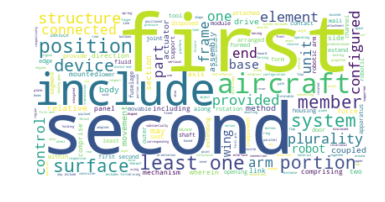

In [16]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# text = " ".join(review for review in labels)


text=str(words_cluster_1)
STOPWORDS.update('from', 'subject', 're', 'edu', 'use','first','second','two','one')



# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



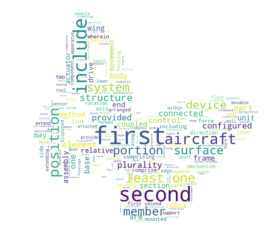

In [37]:
from PIL import Image

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
mask = np.array(Image.open("/buterflow.png"))

# Transform your mask into a new one that will work with the function:
# transformed_wine_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)


text=str(words_cluster_1)
STOPWORDS.update('from', 'subject', 're', 'edu', 'use','first','second','two','one')

# wordcloud = WordCloud(background_color="white", max_words=1000, mask=mask,
#             stopwords=stopwords, contour_width=3, contour_color='firebrick').generate(text)

    

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white",mask=mask).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("/Butterfly.png")



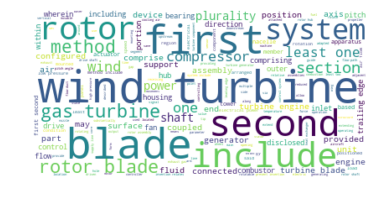

In [209]:
text=str(words_cluster_2)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

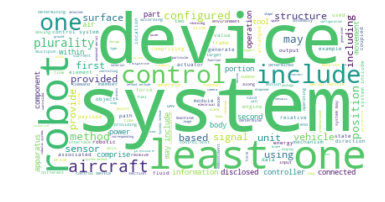

In [210]:
text=str(words_cluster_3)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

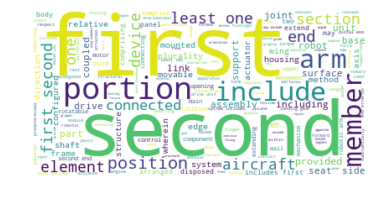

In [212]:
text=str(words_cluster_4)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [215]:

#topic modeling


from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','first','second','two','one'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(newLines))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


# stops word removal                       
data_words_nostops = remove_stopwords(data_words)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['robot_cleaner', 'capable', 'of', 'vacuuming', 'foreign', 'materials', 'on', 'floor', 'includes', 'main', 'body', 'to', 'which', 'dust', 'collector', 'is', 'mounted', 'and', 'vacuuming', 'unit', 'provided', 'at', 'front', 'portion', 'of', 'the', 'main', 'body', 'to', 'clean', 'floor', 'the', 'vacuuming', 'unit', 'is', 'configured', 'to', 'move', 'relative', 'to', 'the', 'main', 'body', 'if', 'it', 'is', 'determined', 'that', 'the', 'robot_cleaner', 'is', 'located', 'near', 'wall', 'or', 'an', 'obstacle', 'the', 'vacuuming', 'unit', 'moves', 'to', 'the', 'wall', 'or', 'the', 'obstacle', 'since', 'the', 'vacuuming', 'unit', 'contacts', 'the', 'wall', 'or', 'the', 'obstacle', 'region', 'of', 'floor', 'near', 'the', 'wall', 'or', 'the', 'obstacle', 'may', 'be', 'cleaned', 'further', 'manual', 'cleaner', 'may', 'be', 'selectively', 'connected', 'to', 'channel', 'connector', 'of', 'the', 'robot_cleaner', 'so', 'that', 'user', 'may', 'choose', 'automatic', 'or', 'manual', 'cleaning', 'of', '

In [179]:
print(trigram_mod[bigram_mod[data_words[2]]])

['robotic', 'telerobotic', 'and', 'or', 'telesurgical', 'devices', 'systems', 'and', 'methods', 'take', 'advantage', 'of', 'robotic', 'structures', 'and', 'data', 'to', 'calculate', 'changes', 'in', 'the', 'focus', 'of', 'an', 'image', 'capture', 'device', 'in', 'response', 'to', 'movement', 'of', 'the', 'image', 'capture', 'device', 'robotic', 'end_effector', 'or', 'the', 'like', 'as', 'the', 'size', 'of', 'an', 'image', 'of', 'an', 'object', 'shown', 'in', 'the', 'display', 'device', 'varies', 'with', 'changes', 'in', 'separation', 'distance', 'between', 'that', 'object', 'and', 'the', 'image', 'capture', 'device', 'used', 'to', 'capture', 'the', 'image', 'scale', 'factor', 'between', 'movement', 'command', 'input', 'may', 'be', 'changed', 'in', 'response', 'to', 'moving', 'an', 'input', 'device', 'or', 'corresponding', 'master', 'slave', 'robotic', 'movement', 'command', 'of', 'the', 'system', 'this', 'may', 'enhance', 'the', 'perceived', 'correlation', 'between', 'the', 'input', 'c

In [216]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [217]:

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#python3 -m spacy download en
nlp = spacy.load('en_core_web_sm')
# nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [218]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 2), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 2), (30, 4), (31, 1), (32, 1), (33, 1), (34, 1), (35, 3), (36, 1), (37, 1), (38, 4), (39, 2), (40, 5), (41, 4)], [(10, 1), (25, 3), (27, 1), (39, 1), (42, 2), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 2), (53, 1), (54, 2), (55, 1), (56, 1), (57, 2), (58, 1), (59, 2), (60, 2), (61, 2)]]


In [137]:
print(corpus[:3])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 2), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 2), (30, 4), (31, 1), (32, 1), (33, 1), (34, 1), (35, 3), (36, 1), (37, 1), (38, 4), (39, 2), (40, 5), (41, 4)], [(10, 1), (25, 3), (27, 1), (39, 1), (42, 2), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 2), (53, 1), (54, 4), (55, 2), (56, 1), (57, 1), (58, 2), (59, 1), (60, 2), (61, 2), (62, 2)], [(25, 2), (53, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 4), (67, 1), (68, 2), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 5), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 6), (83, 3), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 2), (94, 5), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (

In [219]:
 # Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [202]:
#print
pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

[(0,
  '0.011*"housing" + 0.010*"may" + 0.008*"structure" + 0.007*"material" + '
  '0.006*"design" + 0.006*"layer" + 0.005*"system" + 0.005*"circuit" + '
  '0.005*"bottom" + 0.005*"manufacturing"'),
 (1,
  '0.041*"power" + 0.019*"turbine" + 0.016*"flow" + 0.015*"system" + '
  '0.014*"wind" + 0.014*"least" + 0.012*"rotor" + 0.012*"includes" + '
  '0.012*"blade" + 0.011*"air"'),
 (2,
  '0.028*"data" + 0.020*"device" + 0.020*"system" + 0.015*"based" + '
  '0.013*"method" + 0.013*"user" + 0.011*"network" + 0.010*"image" + '
  '0.009*"input" + 0.009*"includes"'),
 (3,
  '0.024*"component" + 0.016*"includes" + 0.013*"installed" + 0.013*"device" + '
  '0.011*"robot" + 0.011*"position" + 0.010*"control" + 0.010*"predetermined" '
  '+ 0.010*"portion" + 0.009*"surface"')]


In [220]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/youssefkindo/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.291340  0.008391       1        1  38.660255
3      0.103719 -0.179571       2        1  26.494333
1      0.078934 -0.082834       3        1  23.484674
0      0.108687  0.254014       4        1  11.360736, topic_info=     Category        Freq           Term        Total  loglift  logprob
term                                                                   
510   Default  787.000000          power   787.000000  30.0000  30.0000
72    Default  876.000000           data   876.000000  29.0000  29.0000
264   Default  539.000000      component   539.000000  28.0000  28.0000
401   Default  370.000000        turbine   370.000000  27.0000  27.0000
426   Default  318.000000           flow   318.000000  26.0000  26.0000
315   Default  480.000000          based   480.000000  25.0000  25.0000
436   Default  278.000000           wind   278.000000  24.0000  24.0000
39    Default  426.000000           user   426.000000  23.0000  23.0000
2321  Default  290.000000      installed   290.000000  22.0000  22.0000
431   Default  236.000000          rotor   236.000000  21.0000  21.0000
279   Default  358.000000        network   358.000000  20.0000  20.0000
127   Default  246.000000          robot   246.000000  19.0000  19.0000
356   Default  225.000000          blade   225.000000  18.0000  18.0000
354   Default  212.000000            air   212.000000  17.0000  17.0000
126   Default  258.000000       position   258.000000  16.0000  16.0000
270   Default  189.000000     electrical   189.000000  15.0000  15.0000
366   Default  189.000000         engine   189.000000  14.0000  14.0000
2203  Default  184.000000         camera   184.000000  13.0000  13.0000
447   Default  260.000000  predetermined   260.000000  12.0000  12.0000
51    Default  257.000000        medical   257.000000  11.0000  11.0000
82    Default  306.000000          input   306.000000  10.0000  10.0000
31    Default  250.000000        portion   250.000000   9.0000   9.0000
3065  Default  246.000000     resolution   246.000000   8.0000   8.0000
1739  Default  103.000000        housing   103.000000   7.0000   7.0000
73    Default  973.000000         device   973.000000   6.0000   6.0000
398   Default  149.000000            gas   149.000000   5.0000   5.0000
1231  Default  172.000000           said   172.000000   4.0000   4.0000
15    Default  223.000000     determined   223.000000   3.0000   3.0000
81    Default  388.000000          image   388.000000   2.0000   2.0000
1314  Default  151.000000          lines   151.000000   1.0000   1.0000
...       ...         ...            ...          ...      ...      ...
6617   Topic4   19.782110          bevel    20.520233   2.1384  -6.1566
3158   Topic4   21.724445         plates    22.585722   2.1361  -6.0630
1411   Topic4   19.693008      implement    20.513847   2.1342  -6.1612
2601   Topic4   16.826403          cells    17.536572   2.1337  -6.3185
6832   Topic4   17.377861            lif    18.119835   2.1332  -6.2862
736    Topic4   21.346735       positive    22.259300   2.1331  -6.0805
4971   Topic4   16.481977      electrode    17.189014   2.1330  -6.3391
2335   Topic4   21.678431        thereby    22.634184   2.1319  -6.0651
2318   Topic4   18.980038       envelope    19.833311   2.1310  -6.1980
7122   Topic4   21.380915  docking_guide    22.541542   2.1221  -6.0789
796    Topic4   27.538370          array    30.522741   2.0721  -5.8258
803    Topic4   53.493607         design    66.935341   1.9508  -5.1619
204    Topic4   30.539757            top    34.704266   2.0472  -5.7224
502    Topic4   53.009766          layer    72.699074   1.8592  -5.1709
286    Topic4   33.658325     structural    45.645638   1.8704  -5.6252
1490   Topic4   38.577641           form    62.646736   1.6902  -5.4887
901    Topic4   25.724508        without    31.089375   1.9856  -5.8940
1300   Topic4   25.589832       l

In [162]:
words_cluster_2[4]

'A high altitude lighter-than-air (LTA) system can include a zero-pressure balloon (ZPB) attached in tandem with one or more variable ballast air super-pressure balloons (SPB). The ZPB provides lift for the system while the SPB uses a centrifugal compressor to provide a variable amount of ballast air by pumping in or expelling out ambient air. A solar array coupled with an elongated ladder assembly can be coupled to a payload support for a payload carried by the LTA system. Various advanced performance targets relating to ascent rate, descent rate, range and maximum altitude are achievable with various scaled versions of the basic design of the LTA system. Advanced navigation and control techniques, such as efficient high altitude station-keeping approaches, are made possible with the LTA system.'

In [185]:
print(data_lemmatized[:1])

[['robot_cleaner', 'capable', 'vacuum', 'foreign', 'material', 'floor', 'include', 'main', 'body', 'dust', 'collector', 'mount', 'vacuum', 'unit', 'provide', 'front', 'portion', 'main', 'body', 'clean', 'floor', 'vacuum', 'unit', 'configure', 'move', 'relative', 'main', 'body', 'determine', 'robot_cleaner', 'locate', 'wall', 'obstacle', 'vacuum', 'unit', 'move', 'wall', 'obstacle', 'vacuum', 'unit', 'contact', 'wall', 'obstacle', 'region', 'floor', 'wall', 'obstacle', 'may', 'clean', 'manual', 'cleaner', 'may', 'selectively', 'connect', 'channel', 'connector', 'robot_cleaner', 'user', 'may', 'choose', 'automatic', 'manual', 'cleaning', 'floor', 'user', 'convenience']]


In [186]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('automatic', 1),
  ('body', 3),
  ('capable', 1),
  ('channel', 1),
  ('choose', 1),
  ('clean', 1),
  ('cleaned', 1),
  ('cleaner', 1),
  ('cleaning', 1),
  ('collector', 1),
  ('configured', 1),
  ('connected', 1),
  ('connector', 1),
  ('contacts', 1),
  ('convenience', 1),
  ('determined', 1),
  ('dust', 1),
  ('floor', 4),
  ('foreign', 1),
  ('front', 1),
  ('includes', 1),
  ('located', 1),
  ('main', 3),
  ('manual', 2),
  ('materials', 1),
  ('may', 3),
  ('mounted', 1),
  ('move', 1),
  ('moves', 1),
  ('near', 2),
  ('obstacle', 4),
  ('portion', 1),
  ('provided', 1),
  ('region', 1),
  ('relative', 1),
  ('robot_cleaner', 3),
  ('selectively', 1),
  ('since', 1),
  ('unit', 4),
  ('user', 2),
  ('vacuuming', 5),
  ('wall', 4)]]

In [ ]:
len(words_cluster_1)